In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
datagen.fit(train_images)


In [3]:
# Build the CNN model with improvements
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        return lr * 0.9
    else:
        return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_schedule])


Epoch 1/20
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:21:47 3s/step - accuracy: 0.0938 - loss: 3.6794

c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.5408 - loss: 1.3481 - val_accuracy: 0.7753 - val_loss: 0.5877 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6955 - loss: 0.8186 - val_accuracy: 0.7677 - val_loss: 0.6059 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7276 - loss: 0.7340 - val_accuracy: 0.7782 - val_loss: 0.5681 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7482 - loss: 0.6877 - val_accuracy: 0.8256 - val_loss: 0.4776 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7560 - loss: 0.6631 - val_accuracy: 0.7924 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7612 - loss: 0.6463 - val_accuracy: 0.8012 - val_loss: 0.5234 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7739 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.4077
Test accuracy (CNN): 85.08%


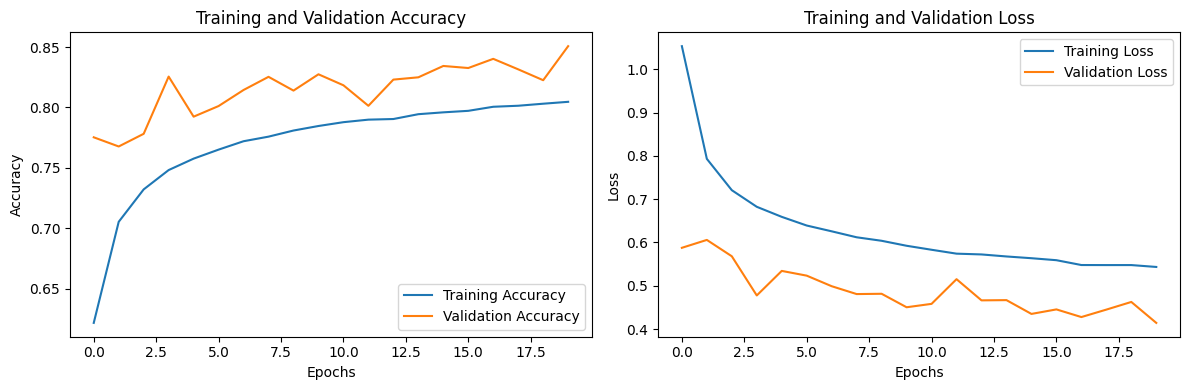

In [5]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy (CNN): {test_accuracy*100:.2f}%")

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


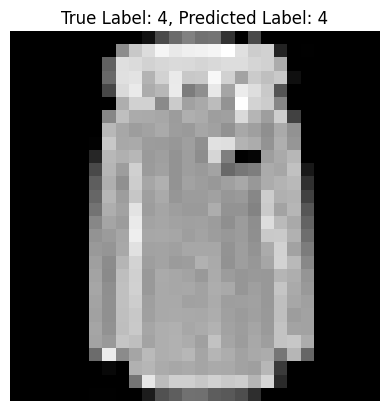

Prediction Probabilities:
Class 0: 2.31%
Class 1: 0.01%
Class 2: 9.82%
Class 3: 4.14%
Class 4: 60.13%
Class 5: 0.00%
Class 6: 22.59%
Class 7: 0.01%
Class 8: 0.98%
Class 9: 0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


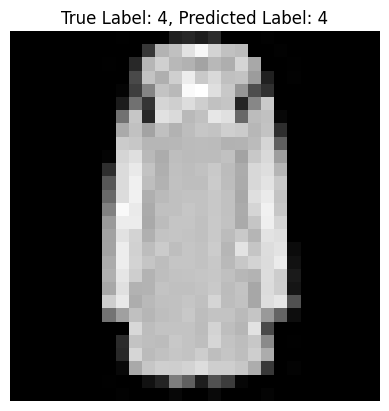

Prediction Probabilities:
Class 0: 2.30%
Class 1: 0.13%
Class 2: 1.44%
Class 3: 18.49%
Class 4: 57.26%
Class 5: 0.06%
Class 6: 9.60%
Class 7: 0.06%
Class 8: 10.57%
Class 9: 0.09%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


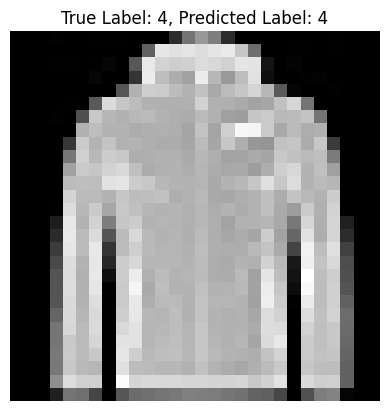

Prediction Probabilities:
Class 0: 0.05%
Class 1: 0.00%
Class 2: 8.06%
Class 3: 0.00%
Class 4: 54.74%
Class 5: 0.00%
Class 6: 37.13%
Class 7: 0.00%
Class 8: 0.01%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


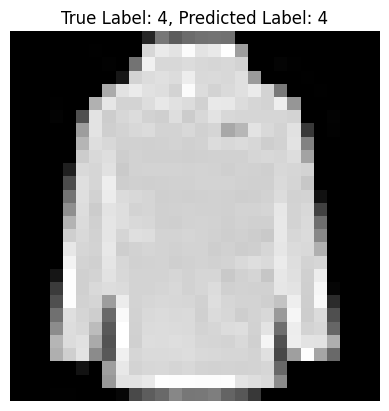

Prediction Probabilities:
Class 0: 0.13%
Class 1: 0.00%
Class 2: 26.23%
Class 3: 0.07%
Class 4: 57.15%
Class 5: 0.00%
Class 6: 16.26%
Class 7: 0.00%
Class 8: 0.16%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


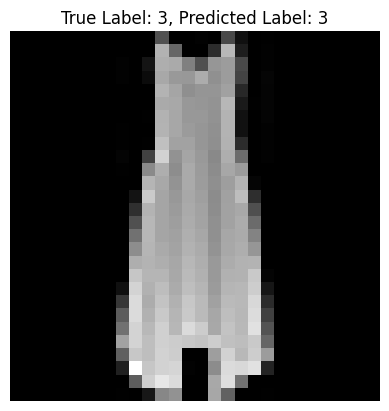

Prediction Probabilities:
Class 0: 6.52%
Class 1: 4.04%
Class 2: 0.45%
Class 3: 63.42%
Class 4: 0.92%
Class 5: 0.11%
Class 6: 12.76%
Class 7: 0.08%
Class 8: 11.15%
Class 9: 0.56%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


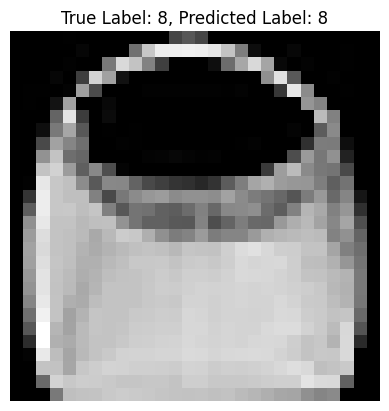

Prediction Probabilities:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 100.00%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


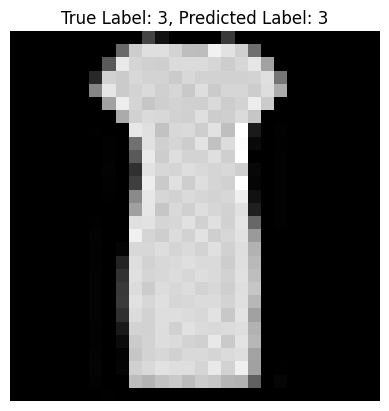

Prediction Probabilities:
Class 0: 23.34%
Class 1: 0.01%
Class 2: 0.00%
Class 3: 67.06%
Class 4: 0.00%
Class 5: 0.01%
Class 6: 9.46%
Class 7: 0.00%
Class 8: 0.11%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


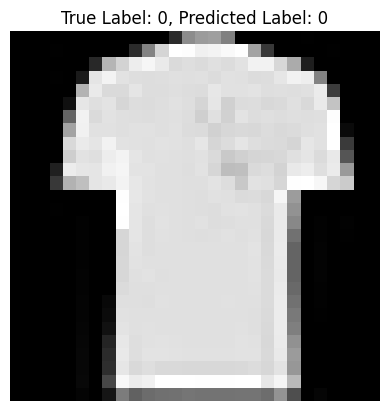

Prediction Probabilities:
Class 0: 96.54%
Class 1: 0.00%
Class 2: 0.03%
Class 3: 0.01%
Class 4: 0.01%
Class 5: 0.00%
Class 6: 3.40%
Class 7: 0.00%
Class 8: 0.02%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


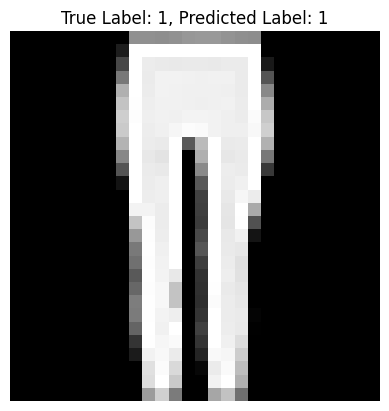

Prediction Probabilities:
Class 0: 0.02%
Class 1: 99.96%
Class 2: 0.01%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


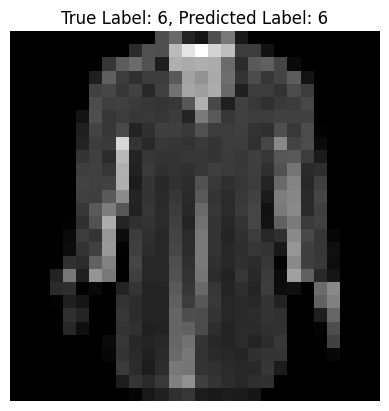

Prediction Probabilities:
Class 0: 0.49%
Class 1: 0.00%
Class 2: 1.21%
Class 3: 0.73%
Class 4: 13.45%
Class 5: 0.00%
Class 6: 84.11%
Class 7: 0.00%
Class 8: 0.01%
Class 9: 0.00%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Choose a random image from test dataset
for _ in range(0,10):
    index = np.random.randint(0, len(test_images))
    image = test_images[index].reshape((28, 28))  # Reshape to 28x28
    true_label = np.argmax(test_labels[index])

    # Predict using the CNN model
    predictions = model.predict(np.expand_dims(test_images[index], axis=0))
    predicted_label = np.argmax(predictions)

    # Plot the image and display true and predicted labels
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

    # Display prediction probabilities
    print("Prediction Probabilities:")
    for i, prob in enumerate(predictions[0]):
        print(f"Class {i}: {prob*100:.2f}%")
